Prediction for the new data point: no


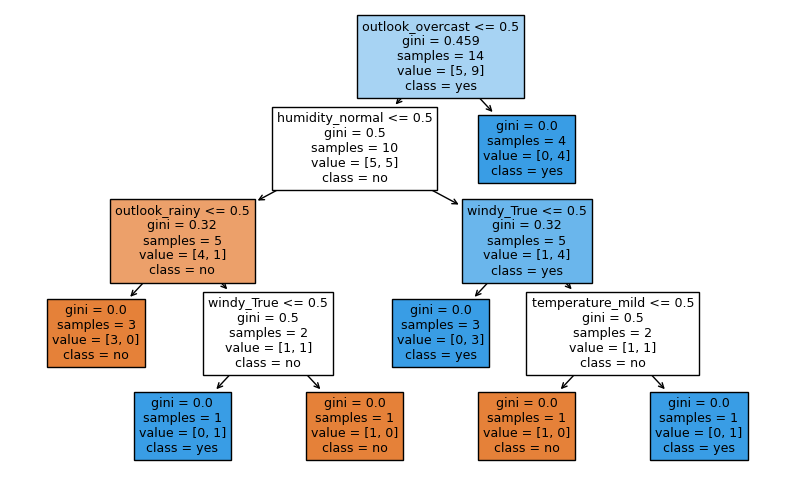

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder

# Load the dataset from a CSV file
data = pd.read_csv('weather.csv')

# Split the dataset into features (X) and target variable (y)
X = data.drop('play', axis=1)
y = data['play']

# One-hot encode categorical variables
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X)

# Create an instance of the Decision Tree Classifier
clf = DecisionTreeClassifier()

# Train the decision tree model
clf.fit(X_encoded, y)

# Define the new data point
new_data_point = {'outlook': 'sunny', 'temperature': 'mild', 'humidity': 'high', 'windy': 'true'}

# Encode the new data point
encoded_data_point = encoder.transform(pd.DataFrame(new_data_point, index=[0]))

# Predict the target value for the new data point using the decision tree
prediction = clf.predict(encoded_data_point)
prediction_label = prediction[0]

print("Prediction for the new data point:", prediction_label)

import matplotlib.pyplot as plt
from sklearn import tree

# Visualize the decision tree
plt.figure(figsize=(10, 6))
tree.plot_tree(clf, feature_names=encoder.get_feature_names_out(X.columns), class_names=clf.classes_, filled=True)
plt.show()